In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# 1. Reading the CSV file
file_path = "missile_data.csv"
data = pd.read_csv(file_path)

In [35]:
# 2. Display basic information about the dataset
print("List of columns:", data.columns.tolist())

List of columns: ['F1', 'Date', 'Date Entered/Updated', 'Missile Name', 'Missile Type', 'Launch Agency/Authority', 'Facility Name', 'Facility Location', 'Other Name', 'Facility Latitude', 'Facility Longitude', 'Landing Location', 'Apogee (km)', 'Distance Travelled (km)', 'Confirmation Status', 'Success', 'Additional Information', 'Source(s)']


In [36]:
# Display dataset size (rows and columns)
print("Dataset sizes:", data.shape)

Dataset sizes: (106, 18)


In [37]:
# Display missing data for each column
print("Missing data in columns:")
print(data.isnull().sum())

Missing data in columns:
F1                          0
Date                        0
Date Entered/Updated        0
Missile Name                0
Missile Type                0
Launch Agency/Authority    96
Facility Name               0
Facility Location           0
Other Name                 42
Facility Latitude           0
Facility Longitude          0
Landing Location           10
Apogee (km)                 7
Distance Travelled (km)    12
Confirmation Status         0
Success                     0
Additional Information     45
Source(s)                   0
dtype: int64


In [38]:
# 3. Handling missing values
# Drop the 'Launch Agency/Authority' column as it is mostly empty
data_cleaned = data.drop(columns=['Launch Agency/Authority'])

# Replace 'Unknown' with None in columns with unspecified data
data_cleaned = data_cleaned.replace({'Unknown': None})

In [39]:
# 4. Perform basic analyses
# Distribution of missile types
missile_types = data_cleaned['Missile Type'].value_counts()
print("\nDistribution of missile types:")
print(missile_types)

# Count the number of successful launches
successful_launches = data_cleaned[data_cleaned['Success'] == "Success"].shape[0]
print(f"\nNumber of successful launches: {successful_launches}")


Distribution of missile types:
Missile Type
SRBM    59
MRBM    24
IRBM     8
SLV      6
SLBM     6
Name: count, dtype: int64

Number of successful launches: 79


In [40]:
# 5. Geographical analysis
# Extract coordinates of launch locations
locations = data_cleaned[['Facility Latitude', 'Facility Longitude']].dropna()

# Convert coordinates to numerical values
locations['Facility Latitude'] = locations['Facility Latitude'].astype(float)
locations['Facility Longitude'] = locations['Facility Longitude'].astype(float)

# Display minimum and maximum coordinates
print("\nCoordinates (lat/lon):")
print("Minimum Latitude:", locations['Facility Latitude'].min())
print("Maximum Latitude:", locations['Facility Latitude'].max())
print("Minimum Longitude:", locations['Facility Longitude'].min())
print("Maximum Longitude:", locations['Facility Longitude'].max())


Coordinates (lat/lon):
Minimum Latitude: 37.9382
Maximum Latitude: 40.8499966
Minimum Longitude: 124.7057
Maximum Longitude: 129.666664


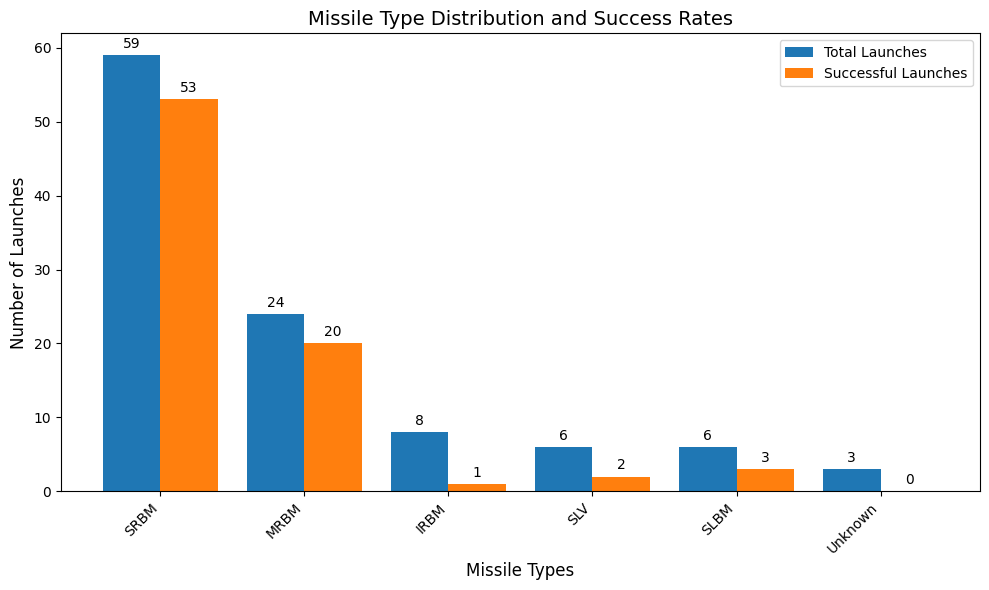

In [41]:
# Data preparation for visualization
data['Success'] = data['Success'].fillna("Unknown")  # Fill missing 'Success' fields
missile_type_counts = data['Missile Type'].value_counts()  # Count by missile type
successful_missile_type_counts = (
    data[data['Success'] == "Success"]['Missile Type'].value_counts()
)  # Successful launches by missile type

# Create arrays for total and successful launches
missile_types = missile_type_counts.index
total_counts = missile_type_counts.values
successful_counts = [successful_missile_type_counts.get(mt, 0) for mt in missile_types]

# Create bar plot
x = np.arange(len(missile_types))  # Positions of bars
width = 0.4  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width / 2, total_counts, width, label="Total Launches")
bar2 = ax.bar(x + width / 2, successful_counts, width, label="Successful Launches")

# Add titles and labels
ax.set_title("Missile Type Distribution and Success Rates", fontsize=14)
ax.set_xlabel("Missile Types", fontsize=12)
ax.set_ylabel("Number of Launches", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(missile_types, rotation=45, ha="right")
ax.legend()

# Annotate bar heights
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Save or show plot
plt.tight_layout()
plt.savefig("missile_type_distribution.png")
plt.show()

/tmp/ipykernel_34921/1526916448.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert dates


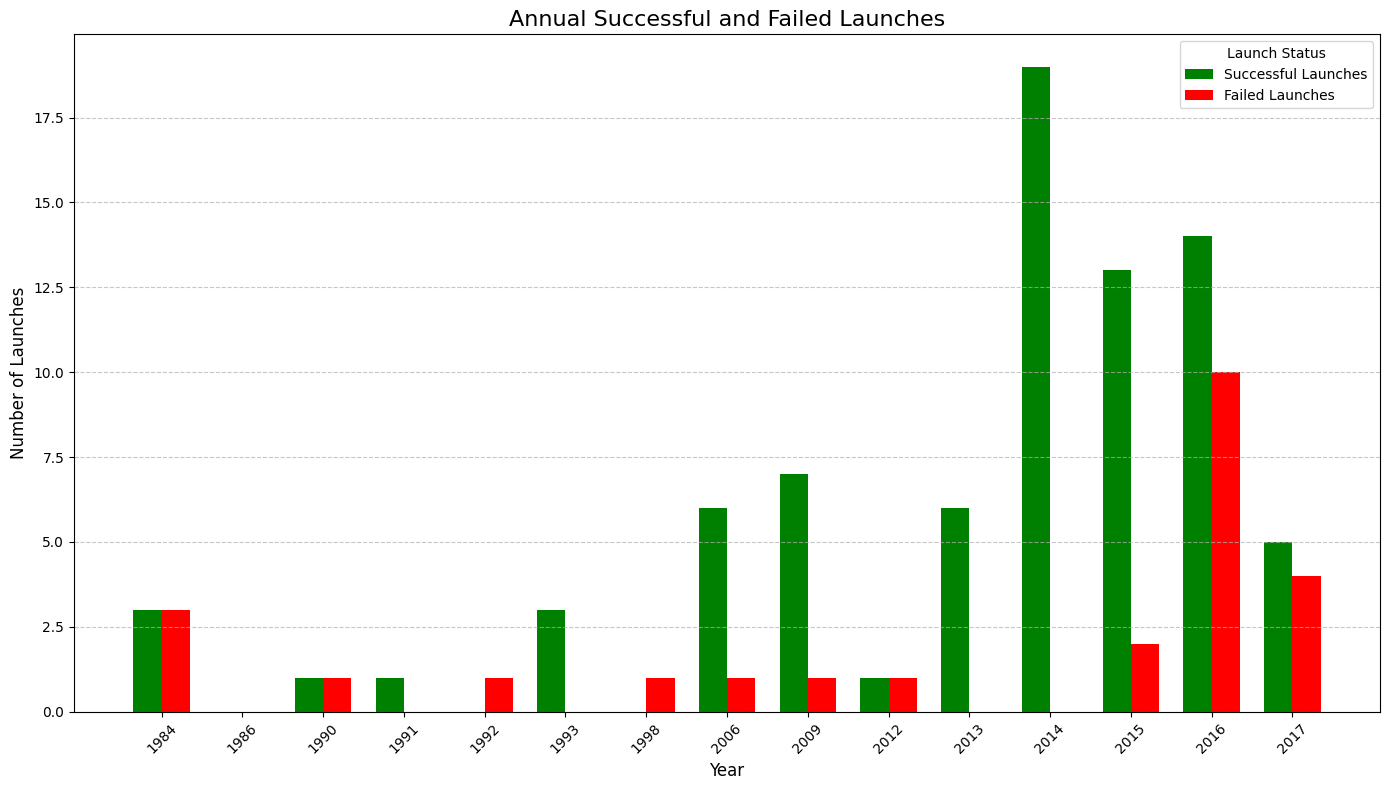

In [42]:
# Process data for annual analysis
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert dates
data = data.dropna(subset=['Date', 'Success'])  # Remove rows with missing data
data['Year'] = data['Date'].dt.year  # Extract the year

# Count successful and unsuccessful launches per year
success_failure_counts = data.groupby(['Year', 'Success']).size().unstack(fill_value=0)

# Prepare data for the bar chart
years = success_failure_counts.index
success_counts = success_failure_counts.get('Success', 0)
failure_counts = success_failure_counts.get('Failure', 0)

# Create bar chart
width = 0.35  # Bar width
x = np.arange(len(years))  # Positions of bars

fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(x - width / 2, success_counts, width, label='Successful Launches', color='green')
ax.bar(x + width / 2, failure_counts, width, label='Failed Launches', color='red')

# Add titles and labels
ax.set_title("Annual Successful and Failed Launches", fontsize=16)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Launches", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=45)
ax.legend(title="Launch Status")
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save or show plot
plt.tight_layout()
plt.savefig("yearly_launch_success_failure.png")
plt.show()